In [1]:
# import libraries

import warnings 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('./archive/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# print dataframe shape

df.shape

(60000, 785)

In [4]:
# check for nulls

df.isnull().sum().sum()

0

In [5]:
# drop the label column

df_mod = df.drop(columns=['label'])
df_mod.shape

(60000, 784)

In [6]:
# recognize unique categories

unique_target = sorted(df['label'].unique())
unique_target

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
# transforming target variable from a vector to a matrix

y = df['label']
y_mod = utils.to_categorical(y, len(unique_target))
y_mod.shape

(60000, 10)

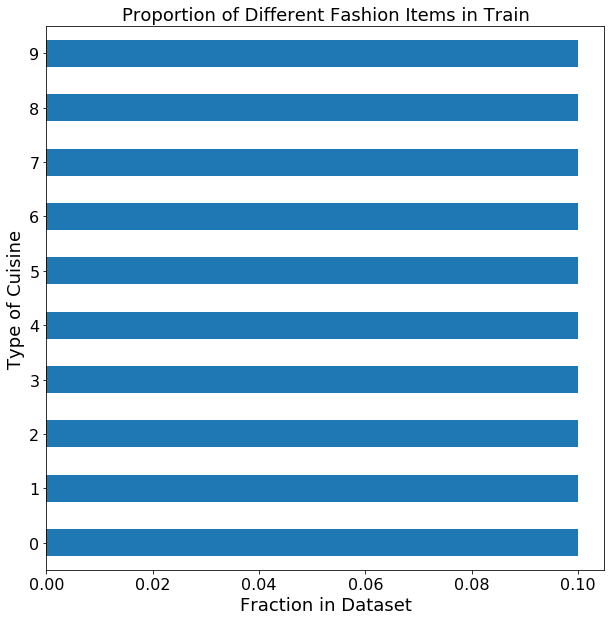

In [8]:
# plot fraction of different fashion categories in dataset

plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
#sns.set(rc={'axes.facecolor':'lavender'})    
df['label'].value_counts(normalize=True)[::-1].sort_index().plot(kind='barh')
plt.title('Proportion of Different Fashion Items in Train', fontsize=18)
plt.ylabel('Type of Cuisine', fontsize=18)
plt.xlabel('Fraction in Dataset', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

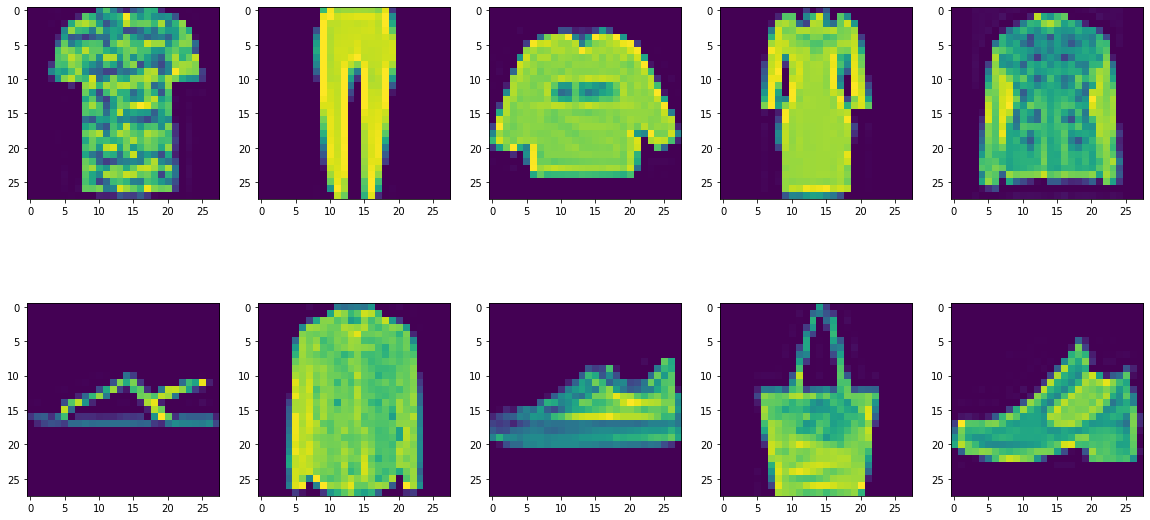

In [9]:
# plot fashion style for each category

lst = [3, 29, 0, 4, 5, 7, 2, 21, 9, 1]

fig= plt.subplots(figsize=(20, 10))
count = 1
i, j = 2,5
for item in lst:
    ax = plt.subplot(i,j,count)
    ax.imshow(np.array(df_mod.iloc[item]).reshape(28, 28));
    count += 1


In [10]:
# convert pixel values to float. 

df_mod = df_mod.astype('float32')/255

In [11]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df_mod, y_mod, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42000, 784), (18000, 784), (42000, 10), (18000, 10))

In [12]:
# implement CNN

n_input = X_train.shape[1] 

model = Sequential()
model.add(Dense(n_input, input_shape = (n_input,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dense(y_train.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=2, mode='auto')

In [13]:
history = model.fit(X_train, y_train, \
                validation_data=(X_test, y_test), epochs=200, \
                    batch_size=1028, verbose=2, callbacks=[early_stop])

Epoch 1/200
41/41 - 2s - loss: 8.4912 - accuracy: 0.4551 - val_loss: 3.9794 - val_accuracy: 0.5693
Epoch 2/200
41/41 - 1s - loss: 2.6939 - accuracy: 0.6507 - val_loss: 1.8899 - val_accuracy: 0.7693
Epoch 3/200
41/41 - 1s - loss: 1.5992 - accuracy: 0.7758 - val_loss: 1.3995 - val_accuracy: 0.7801
Epoch 4/200
41/41 - 1s - loss: 1.2640 - accuracy: 0.7998 - val_loss: 1.2207 - val_accuracy: 0.7932
Epoch 5/200
41/41 - 1s - loss: 1.1347 - accuracy: 0.8060 - val_loss: 1.0847 - val_accuracy: 0.8071
Epoch 6/200
41/41 - 1s - loss: 1.0438 - accuracy: 0.8102 - val_loss: 1.0484 - val_accuracy: 0.7978
Epoch 7/200
41/41 - 1s - loss: 0.9990 - accuracy: 0.8101 - val_loss: 0.9775 - val_accuracy: 0.8199
Epoch 8/200
41/41 - 1s - loss: 0.9368 - accuracy: 0.8223 - val_loss: 0.9092 - val_accuracy: 0.8257
Epoch 9/200
41/41 - 1s - loss: 0.9073 - accuracy: 0.8223 - val_loss: 0.8687 - val_accuracy: 0.8299
Epoch 10/200
41/41 - 1s - loss: 0.8676 - accuracy: 0.8309 - val_loss: 0.8625 - val_accuracy: 0.8255
Epoch 11/

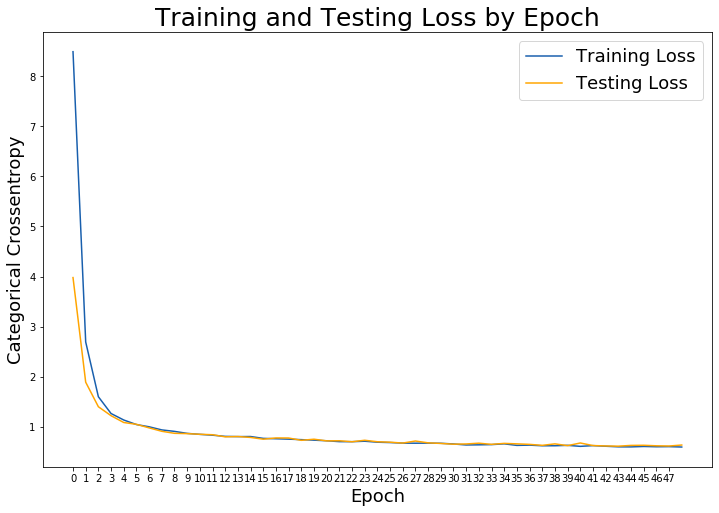

In [14]:
# check out our train and test losses 
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(history.epoch[-1]), np.arange(history.epoch[-1]))

plt.legend(fontsize = 18);

In [15]:
# create a classification report and scores for each category

y_pred = model.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
true_categories = np.argmax(y_test, axis = 1)
print(classification_report(true_categories, predicted_categories))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1800
           1       0.96      0.97      0.97      1800
           2       0.78      0.77      0.77      1800
           3       0.85      0.86      0.85      1800
           4       0.69      0.89      0.78      1800
           5       0.98      0.88      0.93      1800
           6       0.78      0.57      0.66      1800
           7       0.86      0.98      0.91      1800
           8       0.96      0.95      0.96      1800
           9       0.95      0.91      0.93      1800

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



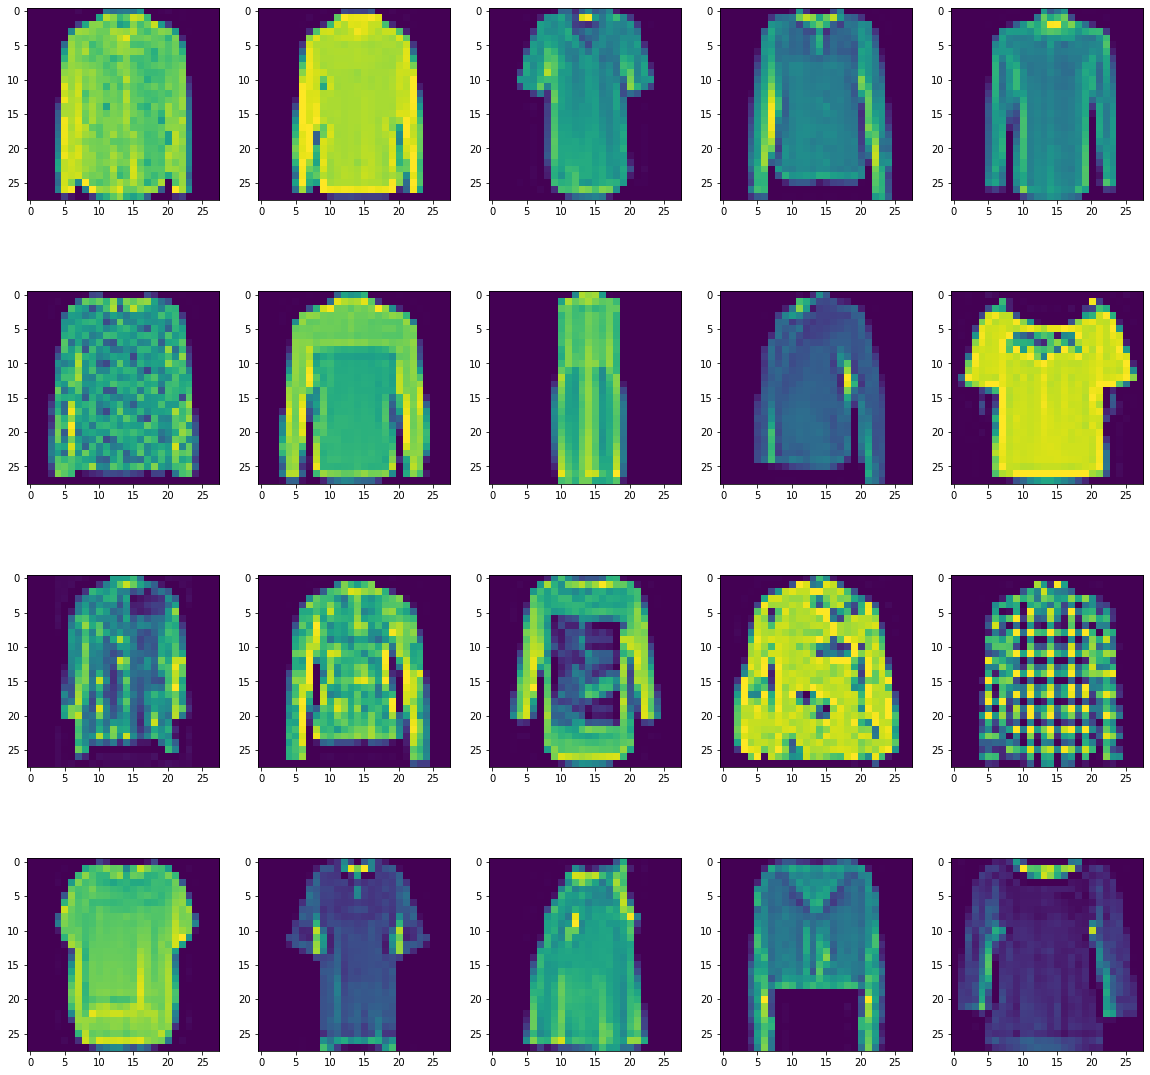

In [16]:
# Visually investigate why the model perfomrs poorly for the category labeled as 6

lst = [2, 40, 43, 46, 62, 74, 82, 87, 88, 90, 108, 112, 116, 121, 123, 125, 131, 133, 141, 146]

fig= plt.subplots(figsize=(20, 20))
count = 1
i, j = 4,5
for item in lst:
    ax = plt.subplot(i,j,count)
    ax.imshow(np.array(df_mod.iloc[item]).reshape(28, 28));
    count += 1